In [1]:
pip install pyspark


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pyspark

In [3]:
from pyspark.sql import SparkSession

In [4]:
spark=SparkSession.builder.appName('pyspark3').getOrCreate()

23/07/19 14:04:36 WARN Utils: Your hostname, user-ThinkPad-E480 resolves to a loopback address: 127.0.1.1; using 10.22.22.233 instead (on interface wlp5s0)
23/07/19 14:04:36 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/07/19 14:04:36 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [5]:
spark


23/07/19 14:04:49 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


In [8]:
PD=spark.read.csv('heartattack_dataset.csv',header=True,inferSchema=True)

In [9]:
PD.show()

+---+---+---+------+----+---+-------+--------+----+-------+---+---+-----+------+
|age|sex| cp|trtbps|chol|fbs|restecg|thalachh|exng|oldpeak|slp|caa|thall|output|
+---+---+---+------+----+---+-------+--------+----+-------+---+---+-----+------+
| 63|  1|  3|   145| 233|  1|      0|     150|   0|    2.3|  0|  0|    1|     1|
| 37|  1|  2|   130| 250|  0|      1|     187|   0|    3.5|  0|  0|    2|     1|
| 41|  0|  1|   130| 204|  0|      0|     172|   0|    1.4|  2|  0|    2|     1|
| 56|  1|  1|   120| 236|  0|      1|     178|   0|    0.8|  2|  0|    2|     1|
| 57|  0|  0|   120| 354|  0|      1|     163|   1|    0.6|  2|  0|    2|     1|
| 57|  1|  0|   140| 192|  0|      1|     148|   0|    0.4|  1|  0|    1|     1|
| 56|  0|  1|   140| 294|  0|      0|     153|   0|    1.3|  1|  0|    2|     1|
| 44|  1|  1|   120| 263|  0|      1|     173|   0|    0.0|  2|  0|    3|     1|
| 52|  1|  2|   172| 199|  1|      1|     162|   0|    0.5|  2|  0|    3|     1|
| 57|  1|  2|   150| 168|  0

In [10]:
PD.count()


303

In [11]:
PD.describe()

DataFrame[summary: string, age: string, sex: string, cp: string, trtbps: string, chol: string, fbs: string, restecg: string, thalachh: string, exng: string, oldpeak: string, slp: string, caa: string, thall: string, output: string]

In [14]:
PD.printSchema()

root
 |-- age: integer (nullable = true)
 |-- sex: integer (nullable = true)
 |-- cp: integer (nullable = true)
 |-- trtbps: integer (nullable = true)
 |-- chol: integer (nullable = true)
 |-- fbs: integer (nullable = true)
 |-- restecg: integer (nullable = true)
 |-- thalachh: integer (nullable = true)
 |-- exng: integer (nullable = true)
 |-- oldpeak: double (nullable = true)
 |-- slp: integer (nullable = true)
 |-- caa: integer (nullable = true)
 |-- thall: integer (nullable = true)
 |-- output: integer (nullable = true)



In [17]:
header=PD.columns

In [18]:
header

['age',
 'sex',
 'cp',
 'trtbps',
 'chol',
 'fbs',
 'restecg',
 'thalachh',
 'exng',
 'oldpeak',
 'slp',
 'caa',
 'thall',
 'output']

In [20]:
PD.distinct().count()

302

In [27]:
columns_null = [col for col in PD.columns if PD.filter(f"{col} IS NULL").count() > 0]

if columns_null:
    print("Null values found")
    for col in columns_null:
        print(col)
else:
    print("None")


None


In [29]:
pip install pandas matplotlib seaborn


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 5.0 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 KB 945.8 kB/s eta 0:00:000:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 KB 1.8 MB/s eta 0:00:00m eta 0:00:010:01
Note: you may need to restart the kernel to use updated packages.


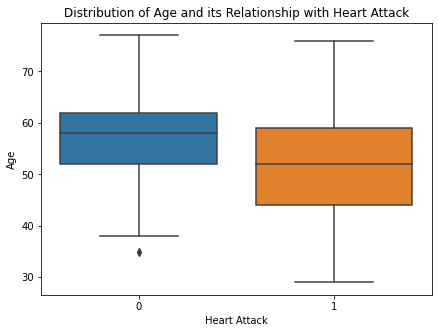

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Age and its relationship with the target variable (heart attack chance).

plt.figure(figsize=(7, 5))
sns.boxplot(x='output', y='age', data=data)
plt.xlabel('Heart Attack')
plt.ylabel('Age')
plt.title('Distribution of Age and its Relationship with Heart Attack')
plt.show()


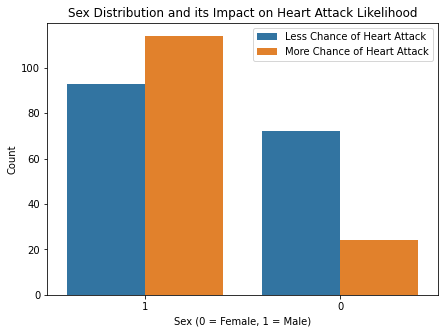

In [79]:
# Bar plot for Sex distribution and its impact on the likelihood of a heart attack.

plt.figure(figsize=(7, 5))
sns.countplot(x='sex', hue='output', data=PD.toPandas())
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.title('Sex Distribution and its Impact on Heart Attack Likelihood')
plt.legend(['Less Chance of Heart Attack', 'More Chance of Heart Attack'])
plt.show()

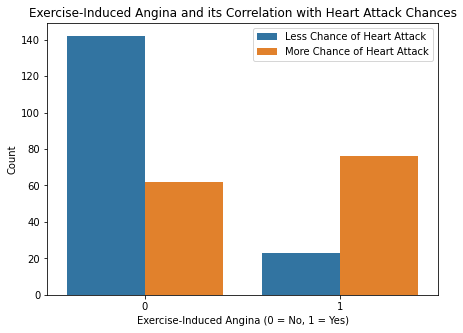

In [75]:
# Count plot for exercise-induced angina (exang) and its correlation with heart attack chances.

plt.figure(figsize=(7,5))
sns.countplot(x='exng', hue='output', data=PD.toPandas())
plt.xlabel('Exercise-Induced Angina (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.title('Exercise-Induced Angina and its Correlation with Heart Attack Chances')
plt.legend(['Less Chance of Heart Attack', 'More Chance of Heart Attack'])
plt.show()

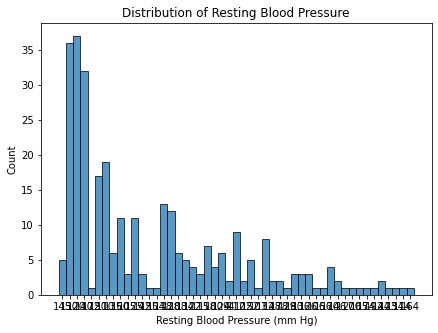

In [76]:
# Resting blood pressure (trtbps) to understand its distribution and potential impact on heart attack chances.

plt.figure(figsize=(7,5))
sns.histplot(data=PD.toPandas(), x='trtbps', bins=15)
plt.xlabel('Resting Blood Pressure (mm Hg)')
plt.ylabel('Count')
plt.title('Distribution of Resting Blood Pressure')
plt.show()

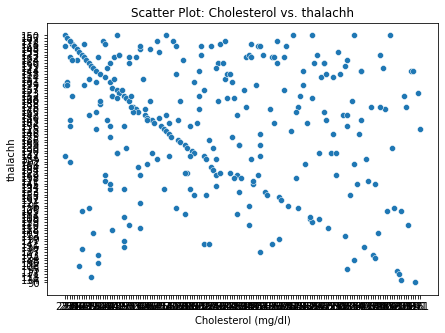

In [77]:
### Scatter Plot between Cholestrol and thalachh

plt.figure(figsize=(7,5))
sns.scatterplot(x='chol', y='thalachh', data=PD.toPandas())
plt.xlabel('Cholesterol (mg/dl)')
plt.ylabel('thalachh')
plt.title('Scatter Plot: Cholesterol vs. thalachh')
plt.show()

In [84]:
from pyspark.sql.functions import round

# Round the 'oldpeak' column to the nearest decimal
PD_rounded = PD.withColumn('rounded_data', round('oldpeak',))
PD_rounded.select('oldpeak', 'rounded_data').show()


+-------+------------+
|oldpeak|rounded_data|
+-------+------------+
|    2.3|         2.0|
|    3.5|         4.0|
|    1.4|         1.0|
|    0.8|         1.0|
|    0.6|         1.0|
|    0.4|         0.0|
|    1.3|         1.0|
|      0|         0.0|
|    0.5|         1.0|
|    1.6|         2.0|
|    1.2|         1.0|
|    0.2|         0.0|
|    0.6|         1.0|
|    1.8|         2.0|
|      1|         1.0|
|    1.6|         2.0|
|      0|         0.0|
|    2.6|         3.0|
|    1.5|         2.0|
|    1.8|         2.0|
+-------+------------+
only showing top 20 rows



In [95]:
from pyspark.sql.functions import col, round


# Calculate the risk score column
PD = PD.withColumn("risk_score", (0.3 * col("age")) + (0.2 * col("trtbps")) + (0.25 * col("chol")) + (0.15 * col("caa")))

# Calculate the percentage of people with risk greater than 60%
risk_per = PD.filter(col("risk_score") > 60).count() / PD.count() * 100

print("Percentage of people with risk greater than 60%: {:.2f}%".format(risk_per))


Percentage of people with risk greater than 60%: 100.00%


In [ ]:
#I have to restart the kernel so I am again creating SparkSession

In [18]:
pip install pyspark


Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: python-debian 0.1.43ubuntu1 has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [19]:
import pyspark

In [20]:
from pyspark.sql import SparkSession

In [21]:
spark=SparkSession.builder.appName('pyspark3').getOrCreate()

23/07/19 17:52:16 WARN Utils: Your hostname, user-ThinkPad-E480 resolves to a loopback address: 127.0.1.1; using 10.22.22.233 instead (on interface wlp5s0)
23/07/19 17:52:16 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/07/19 17:52:16 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [22]:
spark

23/07/19 17:52:36 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


In [23]:
PD=spark.read.csv('heartattack_dataset.csv',header=True,inferSchema=True)

In [24]:
PD.show()

+---+---+---+------+----+---+-------+--------+----+-------+---+---+-----+------+
|age|sex| cp|trtbps|chol|fbs|restecg|thalachh|exng|oldpeak|slp|caa|thall|output|
+---+---+---+------+----+---+-------+--------+----+-------+---+---+-----+------+
| 63|  1|  3|   145| 233|  1|      0|     150|   0|    2.3|  0|  0|    1|     1|
| 37|  1|  2|   130| 250|  0|      1|     187|   0|    3.5|  0|  0|    2|     1|
| 41|  0|  1|   130| 204|  0|      0|     172|   0|    1.4|  2|  0|    2|     1|
| 56|  1|  1|   120| 236|  0|      1|     178|   0|    0.8|  2|  0|    2|     1|
| 57|  0|  0|   120| 354|  0|      1|     163|   1|    0.6|  2|  0|    2|     1|
| 57|  1|  0|   140| 192|  0|      1|     148|   0|    0.4|  1|  0|    1|     1|
| 56|  0|  1|   140| 294|  0|      0|     153|   0|    1.3|  1|  0|    2|     1|
| 44|  1|  1|   120| 263|  0|      1|     173|   0|    0.0|  2|  0|    3|     1|
| 52|  1|  2|   172| 199|  1|      1|     162|   0|    0.5|  2|  0|    3|     1|
| 57|  1|  2|   150| 168|  0

In [26]:
from pyspark.sql.functions import col, min, max

# Sclare thalch  column to 0-1 using an estimator.
min_value = PD.select(min(col('thalachh'))).first()[0]
max_value = PD.select(max(col('thalachh'))).first()[0]

# Scale the 'thalachh' column to the range [0, 1]
df = PD.withColumn('thalachh_scaled', (col('thalachh') - min_value) / (max_value - min_value))

df.show()


+---+---+---+------+----+---+-------+--------+----+-------+---+---+-----+------+------------------+
|age|sex| cp|trtbps|chol|fbs|restecg|thalachh|exng|oldpeak|slp|caa|thall|output|   thalachh_scaled|
+---+---+---+------+----+---+-------+--------+----+-------+---+---+-----+------+------------------+
| 63|  1|  3|   145| 233|  1|      0|     150|   0|    2.3|  0|  0|    1|     1|0.6030534351145038|
| 37|  1|  2|   130| 250|  0|      1|     187|   0|    3.5|  0|  0|    2|     1|0.8854961832061069|
| 41|  0|  1|   130| 204|  0|      0|     172|   0|    1.4|  2|  0|    2|     1|0.7709923664122137|
| 56|  1|  1|   120| 236|  0|      1|     178|   0|    0.8|  2|  0|    2|     1| 0.816793893129771|
| 57|  0|  0|   120| 354|  0|      1|     163|   1|    0.6|  2|  0|    2|     1|0.7022900763358778|
| 57|  1|  0|   140| 192|  0|      1|     148|   0|    0.4|  1|  0|    1|     1|0.5877862595419847|
| 56|  0|  1|   140| 294|  0|      0|     153|   0|    1.3|  1|  0|    2|     1|0.6259541984732825|


In [31]:
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.feature import VectorAssembler

#Scale the 'thalach' column to a common range.
assembler = VectorAssembler(inputCols=['thalachh'], outputCol='features')

# Transform the dataframe to include the vectorized column
SS = assembler.transform(df)

scaler = MinMaxScaler(inputCol='features', outputCol='new_thalachh')
scalernn = scaler.fit(SS)
sd = scalernn.transform(SS)
sd.select('thalachh', 'new_thalachh').show()


+--------+--------------------+
|thalachh|        new_thalachh|
+--------+--------------------+
|     150|[0.6030534351145038]|
|     187|[0.8854961832061068]|
|     172|[0.7709923664122137]|
|     178|[0.8167938931297709]|
|     163|[0.7022900763358778]|
|     148|[0.5877862595419847]|
|     153|[0.6259541984732824]|
|     173|[0.7786259541984732]|
|     162|[0.6946564885496183]|
|     174|[0.7862595419847328]|
|     160|[0.6793893129770993]|
|     139|[0.5190839694656488]|
|     171|[0.7633587786259541]|
|     144|[0.5572519083969465]|
|     162|[0.6946564885496183]|
|     158|[0.6641221374045801]|
|     172|[0.7709923664122137]|
|     114|[0.3282442748091603]|
|     171|[0.7633587786259541]|
|     151|[0.6106870229007634]|
+--------+--------------------+
only showing top 20 rows

